In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

# load data

In [3]:
ratings = pd.read_csv('data/ml-20m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
len(ratings)

20000263

In [5]:
movie_names = pd.read_csv('data/ml-20m/movies.csv').set_index('movieId')['title'].to_dict()
movie_names

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

# update movie / user id so that they are contiguous integers, which we want when using embeddings

In [6]:
users = ratings.userId.unique()
movies = ratings.movieId.unique()
users

array([     1,      2,      3, ..., 138491, 138492, 138493])

In [7]:
userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}
userid2idx

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [8]:
ratings.movieId = ratings.movieId.apply(lambda x: movieid2idx[x])
ratings.userId = ratings.userId.apply(lambda x: userid2idx[x])

In [9]:
user_min, user_max, movie_min, movie_max = (ratings.userId.min(), 
    ratings.userId.max(), ratings.movieId.min(), ratings.movieId.max())
user_min, user_max, movie_min, movie_max

(0, 138492, 0, 26743)

In [10]:
n_users = ratings.userId.nunique()
n_movies = ratings.movieId.nunique()
n_users, n_movies

(138493, 26744)

# split data

In [11]:
import numpy as np

In [12]:
np.random.seed = 42
msk = np.random.rand(len(ratings)) < 0.8
trn = ratings[msk]
val = ratings[~msk]

In [13]:
g = ratings.groupby('userId')['rating'].count()
topUsers = g.sort_values(ascending=False)[:15]
topUsers

userId
118204    9254
8404      7515
82417     5646
121534    5520
125793    5491
74141     5447
34575     5356
131903    5330
83089     5169
59476     4988
130766    4785
79158     4707
8962      4524
15616     4354
92010     4236
Name: rating, dtype: int64

In [14]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]
topMovies

movieId
11     67310
369    66172
12     63366
17     63299
182    59715
9      54502
178    53769
16     52244
331    51334
652    50054
227    49695
237    49581
392    47777
242    47048
4      47006
Name: rating, dtype: int64

In [15]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')
top_r

,userId,movieId,rating,timestamp,rating_r
1225775,8404,227,5.0,1160463838,7515
1225776,8404,0,3.0,1160533952,7515
1225777,8404,175,2.5,1163336461,7515
1225778,8404,1044,1.5,1163336723,7515
1225779,8404,364,4.0,1160532816,7515
1225780,8404,420,2.5,1163336567,7515
1225781,8404,1677,2.0,1163339204,7515
1225782,8404,365,2.5,1160464973,7515
1225783,8404,386,4.0,1160533724,7515
1225784,8404,2614,2.0,1163339415,7515


In [16]:
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')
top_r

,userId,movieId,rating,timestamp,rating_r,rating_r
1225775,8404,227,5.0,1160463838,7515,49695
1313218,8962,227,2.5,1091426444,4524,49695
5031197,34575,227,4.0,1163449264,5356,49695
8612152,59476,227,4.5,1136800269,4988,49695
10717893,74141,227,5.0,955118621,5447,49695
11458368,79158,227,4.5,1148833449,4707,49695
11933145,82417,227,5.0,1000160396,5646,49695
12031987,83089,227,3.0,1029791277,5169,49695
13314460,92010,227,4.0,887813710,4236,49695
17085594,118204,227,4.0,997044423,9254,49695


In [17]:
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,4,9,11,12,16,17,178,182,227,237,242,331,369,392,652
userId,,,,,,,,,,,,,,,
8404,4.5,5.0,5.0,4.5,5.0,5.0,4.0,4.0,5.0,4.5,3.0,5.0,4.5,4.0,5.0
8962,3.5,5.0,3.0,3.5,3.0,5.0,2.0,2.0,2.5,5.0,3.0,2.5,3.5,3.5,4.0
15616,3.5,3.5,4.0,4.0,4.0,4.0,4.5,2.5,NaN,4.0,3.5,5.0,4.0,4.0,4.0
34575,4.0,4.0,4.5,4.0,4.0,4.5,4.0,4.0,4.0,3.5,3.0,4.0,3.5,3.5,4.0
59476,4.5,4.0,5.0,4.5,5.0,3.5,4.5,4.0,4.5,2.5,3.5,3.5,4.0,2.5,4.5
74141,5.0,5.0,5.0,5.0,3.0,2.0,3.0,2.5,5.0,1.0,3.0,5.0,2.0,3.0,5.0
79158,4.5,5.0,4.5,4.5,4.5,4.5,4.0,4.0,4.5,4.5,4.0,5.0,4.0,3.5,4.0
82417,5.0,5.0,5.0,5.0,4.0,5.0,1.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0
83089,5.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0


# embeddings

In [29]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers.merge import dot, add
from keras.regularizers import l2
from keras.models import Model
from keras.layers.core import Flatten
from keras.optimizers import Adam

In [19]:
n_factors = 50
user_in = Input(shape=(1,), dtype='int64', name='user_in')
u = Embedding(n_users, n_factors, input_length=1, embeddings_regularizer=l2(1e-4))(user_in)
movie_in = Input(shape=(1,), dtype='int64', name='movie_in')
m = Embedding(n_movies, n_factors, input_length=1, embeddings_regularizer=l2(1e-4))(movie_in)

In [20]:
x = dot([u, m], axes=(2, 2))
x = Flatten()(x)
model = Model([user_in, movie_in], x)
model.compile(Adam(0.001), loss='mse')
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
user_in (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
movie_in (InputLayer)            (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 50)         6924650     user_in[0][0]                    
____________________________________________________________________________________________________
embedding_2 (Embedding)          (None, 1, 50)         1337200     movie_in[0][0]                   
___________________________________________________________________________________________

## note
for keras2, there are two kinds of dot function
- Dot
    - a Layer
    - https://keras.io/layers/merge/#dot
- dot
    - a functional interface
    - https://keras.io/layers/merge/#dot_1

In [21]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=1, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/1
15999567/15999567 [==============================] - 4204s - loss: 10.5107 - val_loss: 10.4460


In [22]:
model.optimizer.lr = 0.01

In [23]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=3, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/3
15999567/15999567 [==============================] - 4200s - loss: 10.4439 - val_loss: 10.4440
Epoch 2/3
15999567/15999567 [==============================] - 4199s - loss: 10.4442 - val_loss: 10.4493
Epoch 3/3
15999567/15999567 [==============================] - 4200s - loss: 10.4447 - val_loss: 10.4499


In [24]:
model.optimizer.lr = 0.001

In [25]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=6, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/6
15999567/15999567 [==============================] - 4212s - loss: 10.4449 - val_loss: 10.4490
Epoch 2/6
15999567/15999567 [==============================] - 4192s - loss: 10.4441 - val_loss: 10.4462
Epoch 3/6
15999567/15999567 [==============================] - 4191s - loss: 10.4442 - val_loss: 10.4476
Epoch 4/6
15999567/15999567 [==============================] - 4189s - loss: 10.4441 - val_loss: 10.4422
Epoch 5/6
15999567/15999567 [==============================] - 4192s - loss: 10.4444 - val_loss: 10.4507
Epoch 6/6
15999567/15999567 [==============================] - 4190s - loss: 10.4445 - val_loss: 10.4451


# embeddings + bias

In [27]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1, embeddings_regularizer=l2(reg))(inp)
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [28]:
def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)
ub = create_bias(user_in, n_users)
mb = create_bias(movie_in, n_movies)

In [30]:
x = dot([u, m], axes=(2, 2))
x = Flatten()(x)
x = add([x, ub])
x = add([x, mb])
model = Model([user_in, movie_in], x)
model.compile(Adam(0.001), loss='mse')

In [31]:
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=1, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/1
15999567/15999567 [==============================] - 4418s - loss: 1.3628 - val_loss: 0.8133


In [32]:
model.optimizer.lr=0.01
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=6, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/6
15999567/15999567 [==============================] - 4417s - loss: 0.7857 - val_loss: 0.7779
Epoch 2/6
15999567/15999567 [==============================] - 4424s - loss: 0.7645 - val_loss: 0.7675
Epoch 3/6
15999567/15999567 [==============================] - 4422s - loss: 0.7566 - val_loss: 0.7626
Epoch 4/6
15999567/15999567 [==============================] - 4419s - loss: 0.7525 - val_loss: 0.7601
Epoch 5/6
15999567/15999567 [==============================] - 4413s - loss: 0.7501 - val_loss: 0.7583
Epoch 6/6
15999567/15999567 [==============================] - 4415s - loss: 0.7485 - val_loss: 0.7571


In [33]:
model.optimizer.lr=0.001
model.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=10, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/10
15999567/15999567 [==============================] - 4421s - loss: 0.7474 - val_loss: 0.7565
Epoch 2/10
15999567/15999567 [==============================] - 4421s - loss: 0.7467 - val_loss: 0.7557
Epoch 3/10
15999567/15999567 [==============================] - 4421s - loss: 0.7462 - val_loss: 0.7552
Epoch 4/10
15999567/15999567 [==============================] - 4422s - loss: 0.7458 - val_loss: 0.7550
Epoch 5/10
15999567/15999567 [==============================] - 4413s - loss: 0.7456 - val_loss: 0.7547
Epoch 6/10
15999567/15999567 [==============================] - 4414s - loss: 0.7454 - val_loss: 0.7545
Epoch 7/10
15999567/15999567 [==============================] - 4408s - loss: 0.7452 - val_loss: 0.7543
Epoch 8/10
15999567/15999567 [==============================] - 4418s - loss: 0.7452 - val_loss: 0.7543
Epoch 9/10
15999567/15999567 [==============================] - 4420s - loss: 0.7451 - val_loss: 0.7545
Epoch 10/

In [35]:
model.save_weights('embeddings_with_bias.h5')

In [36]:
model.load_weights('embeddings_with_bias.h5')

In [37]:
model.predict([np.array([3]), np.array([6])])

array([[ 3.92086792]], dtype=float32)

# analyze result

In [46]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:2000]
topMovies = np.array(topMovies.index)

In [47]:
get_movie_bias = Model(movie_in, mb)
movie_bias = get_movie_bias.predict(topMovies)
movie_ratings = [(b[0], movie_names[movies[i]]) for i,b in zip(topMovies,movie_bias)]

In [57]:
sorted(movie_ratings, reverse=True)[:15]

[(1.9603461, 'Shawshank Redemption, The (1994)'),
 (1.9458739, 'Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)'),
 (1.9346058, '400 Blows, The (Les quatre cents coups) (1959)'),
 (1.914463, 'Usual Suspects, The (1995)'),
 (1.9083868, 'Seven Samurai (Shichinin no samurai) (1954)'),
 (1.9028715, 'Rashomon (Rashômon) (1950)'),
 (1.8959186, 'Godfather, The (1972)'),
 (1.8716969, 'Third Man, The (1949)'),
 (1.8647444,
  'Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)'),
 (1.8599145, 'Seventh Seal, The (Sjunde inseglet, Det) (1957)'),
 (1.8539822, 'Rear Window (1954)'),
 (1.8534662,
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'),
 (1.849187, 'All About Eve (1950)'),
 (1.847597, 'Yojimbo (1961)'),
 (1.8461171, 'Celebration, The (Festen) (1998)')]

In [60]:
get_movie_emb = Model(movie_in, m)
movie_emb = np.squeeze(get_movie_emb.predict([topMovies]))
movie_emb.shape

(2000, 50)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [66]:
print(movie_pca.shape)
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac0, topMovies)]
sorted(movie_comp, reverse=True)[:10]

(3, 2000)


[(0.99782723, 'Three Colors: Red (Trois couleurs: Rouge) (1994)'),
 (0.027257249, 'Beverly Hills Ninja (1997)'),
 (0.018303936, 'Ghostbusters II (1989)'),
 (0.0091892369, 'Field of Dreams (1989)'),
 (0.0027295805, 'Garden State (2004)'),
 (0.0016888037, 'National Treasure (2004)'),
 (0.0016808584, 'Exorcist, The (1973)'),
 (0.001639095, 'Rudy (1993)'),
 (0.0011379636, "Monster's Ball (2001)"),
 (0.00097046199, 'Naked Gun 2 1/2: The Smell of Fear, The (1991)')]

In [68]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac1, topMovies)]
sorted(movie_comp, reverse=True)[:10]

[(0.94534397, 'Manon of the Spring (Manon des sources) (1986)'),
 (0.30583626, 'Ghostbusters II (1989)'),
 (0.044506397, 'Thunderball (1965)'),
 (0.040352371, 'Three Colors: Red (Trois couleurs: Rouge) (1994)'),
 (0.026002705, 'Naked Gun 2 1/2: The Smell of Fear, The (1991)'),
 (0.0094098058, 'Color Purple, The (1985)'),
 (0.0051749642, 'Meet the Fockers (2004)'),
 (0.0045512309, 'Ghostbusters (a.k.a. Ghost Busters) (1984)'),
 (0.0033430296, 'Swingers (1996)'),
 (0.0027246783, 'Rudy (1993)')]

In [69]:
fac2 = movie_pca[2]
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac2, topMovies)]
sorted(movie_comp, reverse=True)[:10]

[(0.67238545, "Once Upon a Time in the West (C'era una volta il West) (1968)"),
 (0.22507612, 'Manon of the Spring (Manon des sources) (1986)'),
 (0.16087821, 'Taxi Driver (1976)'),
 (0.10498661, 'Thunderball (1965)'),
 (0.040906209, 'Exorcist, The (1973)'),
 (0.035852093, 'Naked Gun 2 1/2: The Smell of Fear, The (1991)'),
 (0.033952437, 'Three Colors: Red (Trois couleurs: Rouge) (1994)'),
 (0.017218925, 'Bourne Supremacy, The (2004)'),
 (0.013941173, 'Apollo 13 (1995)'),
 (0.012603777, 'When Harry Met Sally... (1989)')]

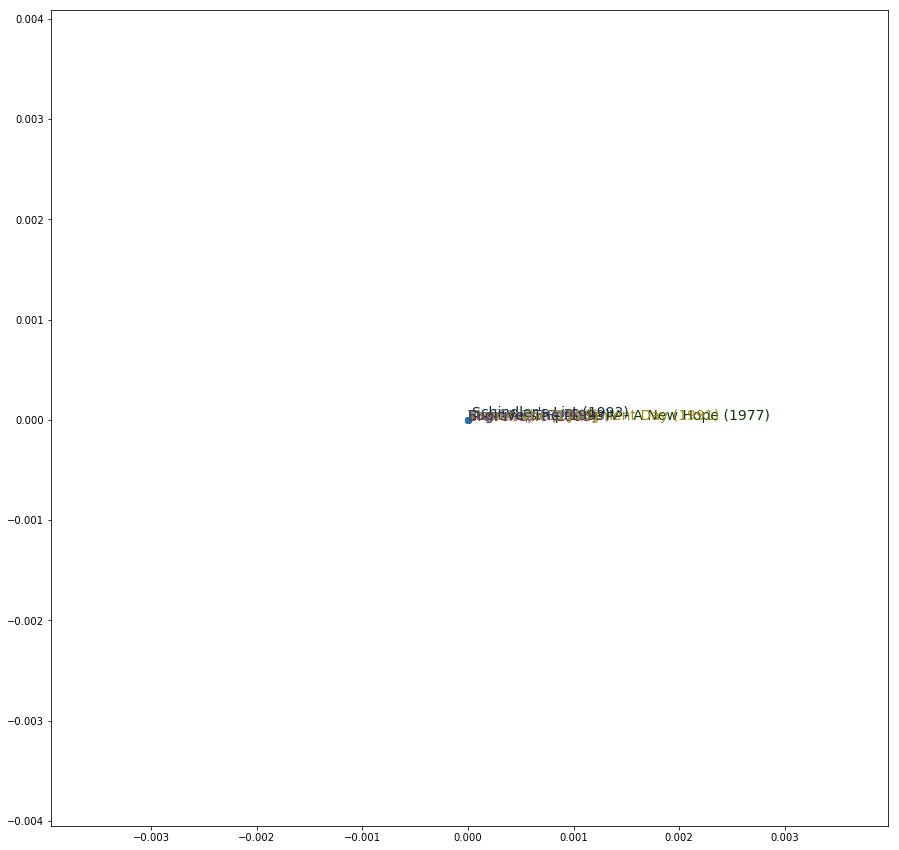

In [85]:
import matplotlib.pyplot as plt

start=5; end=100
X = fac0[start:end:15]
Y = fac1[start:end:15]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[start:end], X, Y):
    plt.text(x,y,movie_names[movies[i]], color=np.random.rand(3)*0.7, fontsize=14)
#axes = plt.gca()
#axes.set_xlim([-0.001,0.001])
#axes.set_ylim([-0.001,0.001])
plt.show()

# neural network

In [86]:
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [91]:
from keras.layers.merge import concatenate
from keras.layers.core import Dropout, Dense

x = concatenate([u, m])
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.75)(x)
x = Dense(1)(x)
nn = Model([user_in, movie_in], x)
nn.compile(Adam(0.001), loss='mse')

In [92]:
nn.fit([trn.userId, trn.movieId], trn.rating, batch_size=64, epochs=8, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 15999567 samples, validate on 4000696 samples
Epoch 1/8
15999567/15999567 [==============================] - 4501s - loss: 1.0052 - val_loss: 0.9508
Epoch 2/8
15999567/15999567 [==============================] - 4487s - loss: 0.9844 - val_loss: 0.9597
Epoch 3/8
15999567/15999567 [==============================] - 4499s - loss: 0.9840 - val_loss: 0.9536
Epoch 4/8
15999567/15999567 [==============================] - 4499s - loss: 0.9840 - val_loss: 0.9513
Epoch 5/8
15999567/15999567 [==============================] - 4511s - loss: 0.9839 - val_loss: 0.9534
Epoch 6/8
15999567/15999567 [==============================] - 4510s - loss: 0.9838 - val_loss: 0.9507
Epoch 7/8
15999567/15999567 [==============================] - 4508s - loss: 0.9840 - val_loss: 0.9512
Epoch 8/8
15999567/15999567 [==============================] - 4514s - loss: 0.9835 - val_loss: 0.9483


In [93]:
model.save_weights('embeddings_with_nn.h5')